# report

> Collection of plotting functions for pairwise cluster comparisons.

In [ ]:
# | default_exp report


In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
# | hide
from nbdev.showdoc import *

from fastcore.test import *
from fastcore.docments import docments


In [ ]:
# | export
import numpy as np
import pandas as pd

import anndata as ad
import scanpy as sc
from samap.mapping import SAMAP

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

from comandos import util


In [ ]:
# | export
def plot_overview(to_plot, celltype_from, celltype_to, figheight=20, save=None):
    """
    Plot a heatmap of pairwise similarities between cell types, with a red box highlighting the
    query cell type.

    Parameters
    ----------
    to_plot : pd.DataFrame
        A dataframe of pairwise similarities between cell types.
    celltype_from : str
        Cell type of the query species to highlight. Must be in `to_plot.columns`.
    celltype_to : str
        Cell type of the target species to highlight. Must be in `to_plot.index`.
    figheight : float, optional
        Height of the resulting plot in inches. Width will be calculated automatically (default:
        20).
    save : str, optional
        Path to result figure; if None, the figure will be plotted but not saved (default: None).

    Returns
    -------
    None
    """
    figwidth = int(to_plot.shape[0] / to_plot.shape[1] * figheight)
    y = np.where(to_plot.columns == celltype_from)[0][0]
    x = np.where(to_plot.index == celltype_to)[0][0]

    fig, ax = plt.subplots(figsize=(figwidth, figheight))
    g = sns.heatmap(to_plot.T, ax=ax, cmap="mako")

    ax = g.axes
    ax.add_patch(Rectangle((x, y), 1, 1, fill=False, edgecolor="red", lw=3))
    ax.hlines(y + 0.5, 0, x, colors="red", linestyles="dashed")
    ymax = to_plot.shape[1]
    ax.vlines(x + 0.5, y + 1, ymax, colors="red", linestyles="dashed")
    if save is not None:
        plt.savefig(save)


In [ ]:
hysc = pd.read_csv("../example_data/hysc_similarity_table.csv", index_col=0)

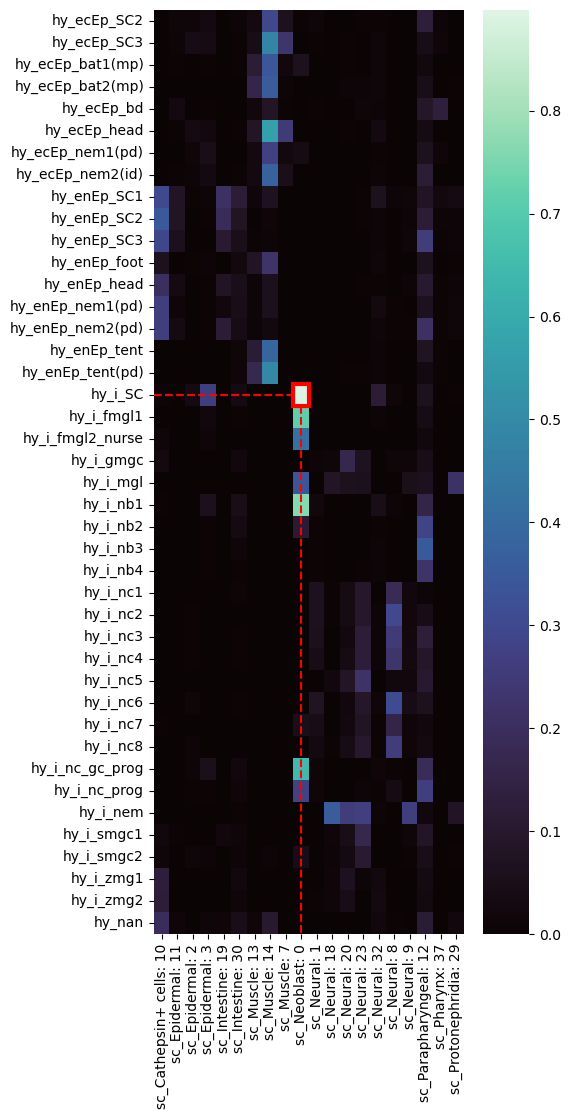

In [ ]:
plot_overview(hysc, celltype_from="hy_i_SC", celltype_to="sc_Neoblast: 0", figheight=12)
